1. Graphical exploratory data analysis
2. Quantitative exploratory data analysis
3. Thinking probabilistically-- Discrete variables
4. Thinking probabilistically-- Continuous variables


# Graphical exploratory data analysis
## Introduction to Exploratory data analysis
## Plotting a histogram

In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data['data'])
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df['species'] = '' 

df['species'][:50] = 'setosa'
df['species'][50:100] = 'versicolor'
df['species'][100:150] = 'virginica'
df.head()

versicolor_petal_length = df[df['species']=='versicolor']['petal length (cm)'].values
setosa_petal_length = df[df['species'] == 'setosa']['petal length (cm)'].values
virginica_petal_length = df[df['species'] == 'virginica']['petal length (cm)'].values

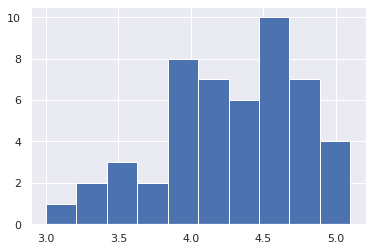

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.hist(versicolor_petal_length)
plt.show()

## Axis labels!

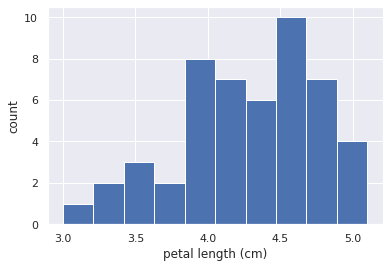

In [5]:
_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

plt.show()

## Adjusting the number of bins in a histogram

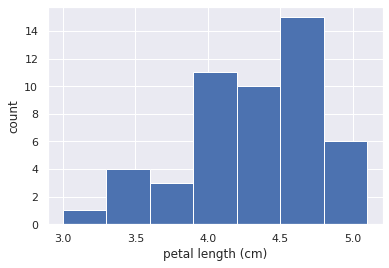

In [6]:
n_data = len(versicolor_petal_length)
n_bins = np.sqrt(n_data).astype(int)

_ = plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

plt.show()

# Plot all your data: Bee swarm plots
## Bee swarm plot

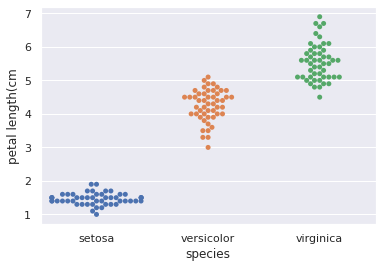

In [7]:
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length(cm')
plt.show()

# Plot all of your data: ECDFs
## Computing the ECDF

In [8]:
def ecdf(data):
  """ Compute ECDF for a one-dimensioal array of measurements"""
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1)/n

  return x, y

## Plotting the ECDF

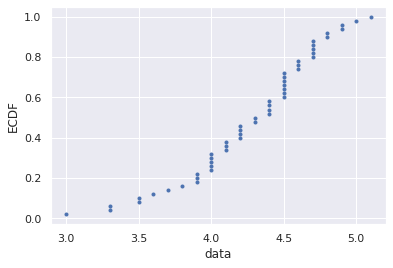

In [9]:
x_vers, y_vers = ecdf(versicolor_petal_length)

_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.xlabel('data')
_ = plt.ylabel('ECDF')

plt.show()

## Comparsion of ECDFs

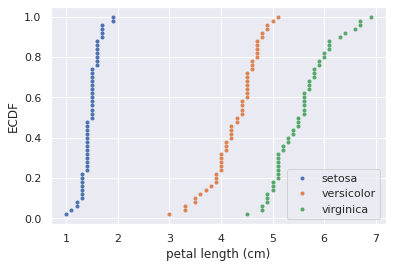

In [10]:
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.show()

# Quantitative exploratory data analysis
# Introduction to summary statistics: The sample mean and median
## Computing means

In [11]:
mean_length_vers = np.mean(versicolor_petal_length)

print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


# Percentiles, outliers, and box plots
## Computing percentiles

In [12]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptitles_vers = np.percentile(versicolor_petal_length, percentiles)

print(ptitles_vers)

[3.3    4.     4.35   4.6    4.9775]


## Comparing percentiles to ECDF

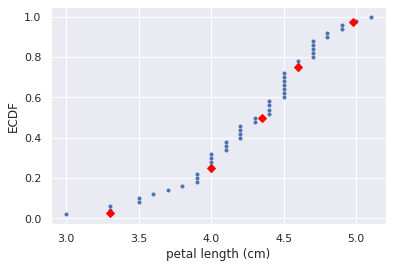

In [13]:
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

_ = plt.plot(ptitles_vers, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()

## Box-and-whisker plot

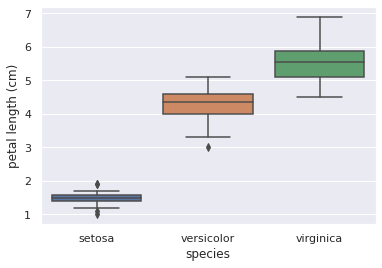

In [14]:
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

plt.show()

# Variance and standard deviation
## Computing the variance

In [15]:
differences = np.array(versicolor_petal_length - np.mean(versicolor_petal_length))
diff_sq = differences ** 2

variance_explicit = np.mean(diff_sq)
variance_np = np.var(differences)

print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


## The standard deviation and the variance

In [16]:
variance = np.var(versicolor_petal_length)
print(np.sqrt(variance))
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


# Covariance and the Pearson correlation coefficient
## Scatter plots

In [17]:
versicolor_petal_width = df[df['species']=='versicolor']['petal width (cm)'].values
setosa_petal_width = df[df['species'] == 'setosa']['petal width (cm)'].values
virginica_petal_width = df[df['species'] == 'virginica']['petal width (cm)'].values

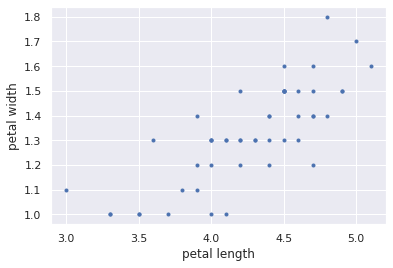

In [18]:
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')
_ = plt.xlabel('petal length')
_ = plt.ylabel('petal width')

plt.show()

## Computing the covariance

In [19]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

print(covariance_matrix)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]


In [20]:
petal_cov = covariance_matrix[0, 1]
print(petal_cov)

0.07310204081632653


## Computing the Pearson correlation coefficient

In [21]:
def pearson_r(x, y):
  """Compute Pearson correlation coefficient between two arrays"""
  corr_mat = np.corrcoef(x, y)
  return corr_mat[0, 1]

r = pearson_r(versicolor_petal_length, versicolor_petal_width)

print(r)

0.7866680885228169


# Thinking probabilistically -- Discrete variables


# Random number generators and hacker statistics
## Generating random numbers using the np.random module

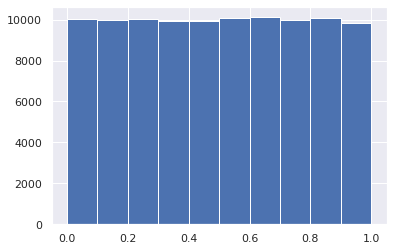

In [22]:
np.random.seed(42)
random_numbers = np.empty(100000)
for i in range(100000):
  random_numbers[i] = np.random.random()

_ = plt.hist(random_numbers)
plt.show()

## The np.random module and Bernoulli trials

In [23]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    n_success = 0
    
    for i in range(n):

        random_number = np.random.random()
        
        if random_number < p:
            n_success += 1
            
    return n_success

## How many defaults might we expect?

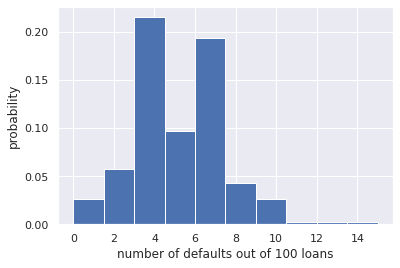

In [24]:
np.random.seed(42)
n_defaults = np.empty(1000)

for i in range(1000):
   
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()

## Will the bank fail?

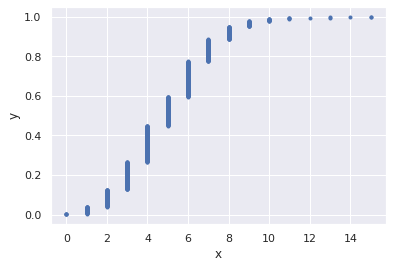

In [25]:
x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

plt.show()

In [26]:
n_lose_money = np.sum(n_defaults >= 10)

print('Probability of losing money =', n_lose_money / len(n_defaults))

Probability of losing money = 0.022


# Probability distributions and stories: Binomial distribution
## Sampling out of the Binomial distribution

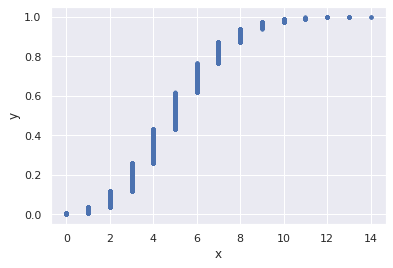

In [27]:
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

x, y = ecdf(n_defaults)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

plt.show()

## Plotting the Binomial PMF

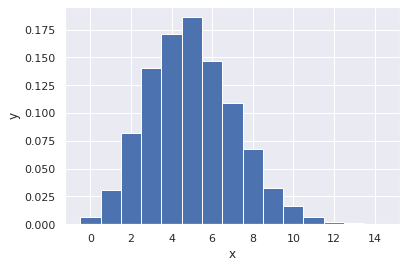

In [28]:
bins = np.arange(0, max(n_defaults)+2) - 0.5

_ = plt.hist(n_defaults, bins=bins, density=True)
_ = plt.xlabel('x')
_ = plt.ylabel('y')

plt.show()

# Poisson processes and the Poisson distribution
## Relationship between Binomial and Poisson distributions

In [31]:
samples_poisson = np.random.poisson(10, 10000)

print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

Poisson:      10.0145 3.1713545607516043


In [33]:
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

for i in range(3):
    samples_bionomial = np.random.binomial(n[i], p[i], size=10000)

    print('n =', n[i], 'Binom:', np.mean(samples_poisson), np.std(samples_poisson))

n = 20 Binom: 10.0145 3.1713545607516043
n = 100 Binom: 10.0145 3.1713545607516043
n = 1000 Binom: 10.0145 3.1713545607516043


## Was 2015 anomalous?

In [35]:
n_nohitters = np.random.poisson(251/115, 10000)
n_large = np.sum(n_nohitters >= 7)
p_large = n_large / 10000

print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0062


In [38]:
p_large

0.0062

# Thinking probabilistically -- Continuous variables
# Introduction to the Normal distribution
# The Normal PDF

In [39]:
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

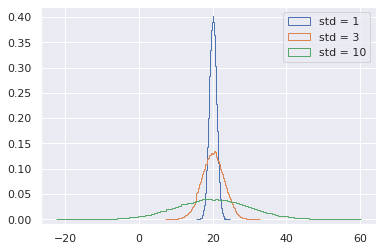

In [43]:
_ = plt.hist(samples_std1, histtype='step', density=True, bins=100)
_ = plt.hist(samples_std3, histtype='step', density=True, bins=100)
_ = plt.hist(samples_std10, histtype='step', density=True, bins=100)

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

# The normal CDF

In [44]:
def ecdf(data):
    """Computer ECDF for a one-dimentional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

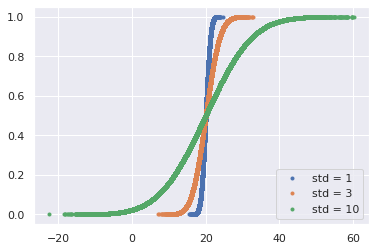

In [46]:
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

# The Normal distribution: Properties and warnings
## Are the Belmont Stakes results Normally distributed?

In [47]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

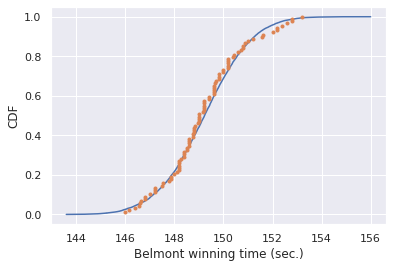

In [50]:
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

samples = np.random.normal(mu, sigma, size=10000)

x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')

plt.show()

## What are the chances of a horse matching or beating Secretariat's record

In [51]:
samples = np.random.normal(mu, sigma, size=1000000)
prob = np.sum(samples < 144) / len(samples)
print('Probability of besting Secretarist:', prob)

Probability of besting Secretarist: 0.000596


# The Exponential distribution
## If you have a story, you can simulate it!

In [52]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

## Distribution of no-hitters and cycles

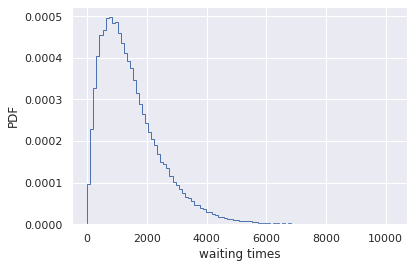

In [53]:
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
_ = plt.xlabel('waiting times')
_ = plt.ylabel('PDF')